##**12. Descargar los datos:**


In [ ]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Descargar los archivos de datos
nombre_archivo_train_sin_procesar = 'train_data_sin_procesar.pkl'

with open(nombre_archivo_train_sin_procesar, 'rb') as archivo:
    train_data_sin_procesar = pickle.load(archivo)

In [ ]:
train_data_sin_procesar.shape

(173, 13)

##**13. Ajuste de Hiperparámetros:**

Aunque los hiperparámetros han sido especificados inicialmente al entrenar los modelos, se procederá a su ajuste sistemático (como el bandwidth en Mean Shift, o el affinity en Spectral) para maximizar métricas y coherencia visual:

  - **K-Means** y **Agglomerative**: se evaluarán valores de k en torno a 3-4, con variación de linkage en Agglomerative.

  - **Spectral Clustering**: se evaluará la influencia de distintas afinidades (rbf, nearest_neighbors) y valores de k.

El conjunto de datos a utilizar son:

      - train_data_sin_procesar

In [ ]:
# Importar diferentes modelos de clustering
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, SpectralClustering

# Importar métricas
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

###**13.1. K-Means:**

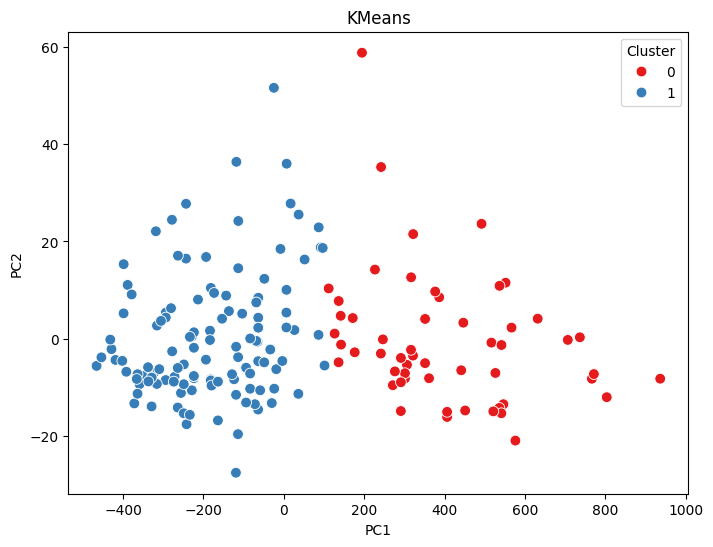

Silhouette Score: 0.656
Davies-Bouldin Score: 0.484
Calinski-Harabasz Score: 488.062


In [ ]:
# K-means
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(train_data_sin_procesar)

# Realizar PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(train_data_sin_procesar)

# Graficar la solución
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_clusters, palette="Set1", s=60)
plt.title("KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

## Cálculo de Métricas de Evaluación de Clustering

# Silhouette Score
silhouette_avg = silhouette_score(train_data_sin_procesar, kmeans_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(train_data_sin_procesar, kmeans_clusters)
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(train_data_sin_procesar, kmeans_clusters)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.3f}")

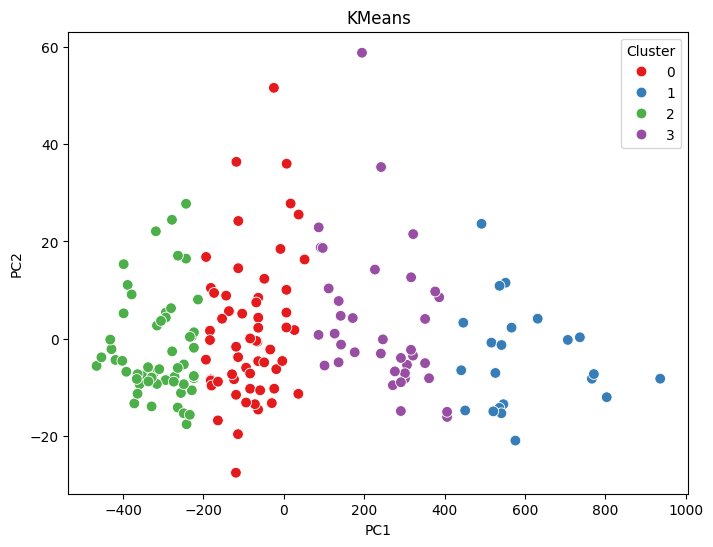

Silhouette Score: 0.563
Davies-Bouldin Score: 0.543
Calinski-Harabasz Score: 689.423


In [ ]:
# K-means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(train_data_sin_procesar)

# Realizar PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(train_data_sin_procesar)

# Graficar la solución
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_clusters, palette="Set1", s=60)
plt.title("KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

## Cálculo de Métricas de Evaluación de Clustering

# Silhouette Score
silhouette_avg = silhouette_score(train_data_sin_procesar, kmeans_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(train_data_sin_procesar, kmeans_clusters)
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(train_data_sin_procesar, kmeans_clusters)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.3f}")

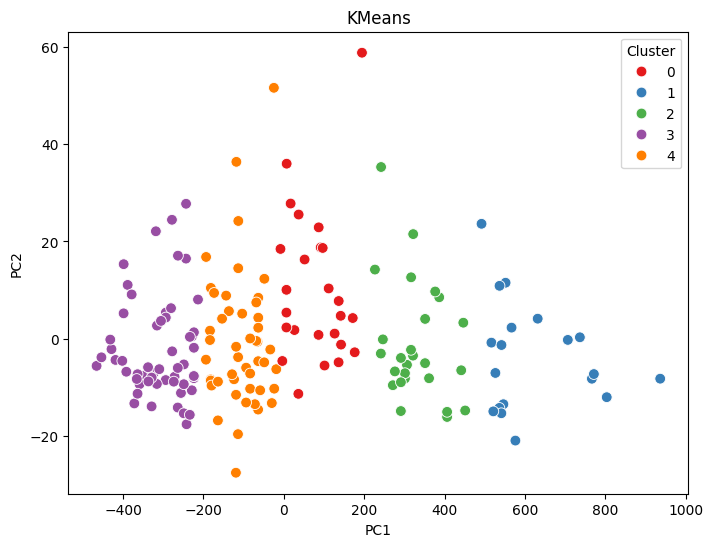

Silhouette Score: 0.545
Davies-Bouldin Score: 0.552
Calinski-Harabasz Score: 753.896


In [ ]:
# K-means
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(train_data_sin_procesar)

# Realizar PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(train_data_sin_procesar)

# Graficar la solución
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_clusters, palette="Set1", s=60)
plt.title("KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

## Cálculo de Métricas de Evaluación de Clustering

# Silhouette Score
silhouette_avg = silhouette_score(train_data_sin_procesar, kmeans_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(train_data_sin_procesar, kmeans_clusters)
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(train_data_sin_procesar, kmeans_clusters)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.3f}")

###**13.2. Agglomerative Clustering:**

In [ ]:
# Importar la libreria correspondiente
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos
train_data, test_data = train_test_split(train_data_sin_procesar, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos resultantes
print("Forma del conjunto de entrenamiento:", train_data.shape)
print("Forma del conjunto de test:", test_data.shape)

Forma del conjunto de entrenamiento: (138, 13)
Forma del conjunto de test: (35, 13)


In [ ]:
# Defino función para evaluar distintos valores de linkage con k=3
def evaluar_agglomerative(train_data, test_data, k=3, linkages=['ward', 'complete', 'average', 'single']):
    resultados = []
    for linkage in linkages:
        if linkage == 'ward':
            model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        else:
            model = AgglomerativeClustering(n_clusters=k, linkage=linkage, metric='euclidean')

        # Ajustar el modelo con los datos de entrenamiento
        model.fit(train_data)
        # Predecir etiquetas en los datos de validación
        labels_val = model.fit_predict(test_data)

        # Evaluar
        resultados.append({
            'Linkage': linkage,
            'Silhouette': silhouette_score(test_data, labels_val),
            'Davies-Bouldin': davies_bouldin_score(test_data, labels_val),
            'Calinski-Harabasz': calinski_harabasz_score(test_data, labels_val)
        })
    return pd.DataFrame(resultados)

# Ejecutar
resultados_agglomerative = evaluar_agglomerative(train_data, test_data)
print(resultados_agglomerative)

    Linkage  Silhouette  Davies-Bouldin  Calinski-Harabasz
0      ward    0.575195        0.476343         108.843877
1  complete    0.604525        0.478854          68.803345
2   average    0.604525        0.478854          68.803345
3    single    0.576677        0.338924          40.532140


In [ ]:
# Defino función para evaluar distintos valores de linkage con k=4
def evaluar_agglomerative(train_data, test_data, k=4, linkages=['ward', 'complete', 'average', 'single']):
    resultados = []
    for linkage in linkages:
        if linkage == 'ward':
            model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        else:
            model = AgglomerativeClustering(n_clusters=k, linkage=linkage, metric='euclidean')

        # Ajustar el modelo con los datos de entrenamiento
        model.fit(train_data)
        # Predecir etiquetas en los datos de validación
        labels_val = model.fit_predict(test_data)

        # Evaluar
        resultados.append({
            'Linkage': linkage,
            'Silhouette': silhouette_score(test_data, labels_val),
            'Davies-Bouldin': davies_bouldin_score(test_data, labels_val),
            'Calinski-Harabasz': calinski_harabasz_score(test_data, labels_val)
        })
    return pd.DataFrame(resultados)

# Ejecutar
resultados_agglomerative = evaluar_agglomerative(train_data, test_data)
print(resultados_agglomerative)

    Linkage  Silhouette  Davies-Bouldin  Calinski-Harabasz
0      ward    0.571332        0.496595         136.648624
1  complete    0.571332        0.496595         136.648624
2   average    0.577931        0.500607         140.473967
3    single    0.544368        0.250572          26.564852


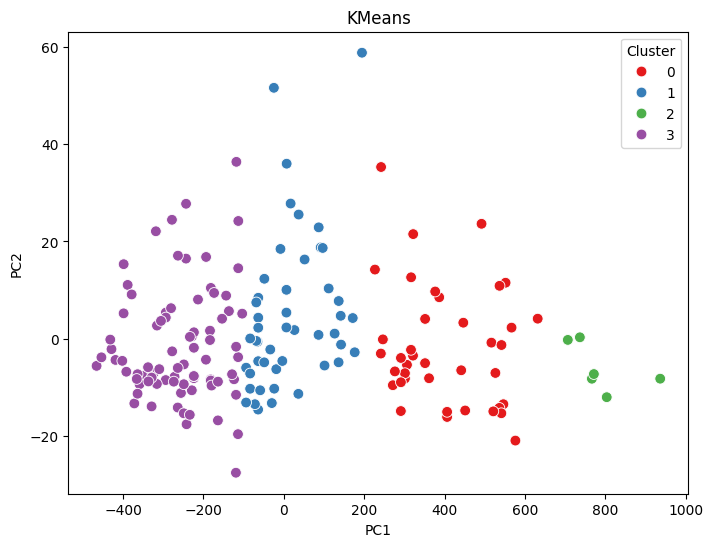

Silhouette Score: 0.532
Davies-Bouldin Score: 0.507
Calinski-Harabasz Score: 525.210


In [ ]:
# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4, linkage="average")
agg_clusters = agg.fit_predict(train_data_sin_procesar)

# Graficar la solución
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=agg_clusters, palette="Set1", s=60)
plt.title("KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

## Cálculo de Métricas de Evaluación de Clustering

# Silhouette Score
silhouette_avg = silhouette_score(train_data_sin_procesar, agg_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(train_data_sin_procesar, agg_clusters)
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(train_data_sin_procesar, agg_clusters)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.3f}")


###**13.3. Spectral Clustering:**

In [ ]:
# Spectral Clustering
def evaluar_spectral(X, ks=(3, 4),
                     affinities=('nearest_neighbors', 'rbf'),
                     nn_list=(5, 10)):           # nº de vecinos si affinity='nearest_neighbors'
    """
    Devuelve un DataFrame con las métricas Silhouette, Davies-Bouldin y Calinski-Harabasz
    para varias combinaciones de (k, affinity, n_neighbors / gamma).
    """
    resultados = []

    for k in ks:
        for affinity in affinities:
            # Ajustes específicos según el tipo de afinidad
            if affinity == 'nearest_neighbors':
                for n_neighbors in nn_list:
                    model = SpectralClustering(n_clusters=k,
                                               affinity=affinity,
                                               n_neighbors=n_neighbors,
                                               assign_labels='kmeans',
                                               random_state=42)
                    labels = model.fit_predict(X)

                    # Comprobar si el número de etiquetas es mayor que 1
                    n_labels = len(np.unique(labels))

                    if n_labels > 1:
                        resultados.append({
                            'k'          : k,
                            'affinity'   : affinity,
                            'param'      : f'n_neighbors={n_neighbors}',
                            'Silhouette' : silhouette_score(X, labels),
                            'Davies-B'   : davies_bouldin_score(X, labels),
                            'Calinski-H' : calinski_harabasz_score(X, labels)
                        })
                    else:
                         # Añadir resultados con NaN si solo se encuentra un cluster
                         resultados.append({
                            'k'          : k,
                            'affinity'   : affinity,
                            'param'      : f'n_neighbors={n_neighbors}',
                            'Silhouette' : np.nan,
                            'Davies-B'   : np.nan,
                            'Calinski-H' : np.nan
                        })

            else:  # affinity == 'rbf'
                for gamma in [0.5, 1.0, 2.0]:
                    model = SpectralClustering(n_clusters=k,
                                               affinity=affinity,
                                               gamma=gamma,
                                               assign_labels='kmeans',
                                               random_state=42)
                    labels = model.fit_predict(X)

                    # Comprobar si el numero de etiquetas es mayor que 1
                    n_labels = len(np.unique(labels))

                    if n_labels > 1:
                        resultados.append({
                            'k'          : k,
                            'affinity'   : affinity,
                            'param'      : f'gamma={gamma}',
                            'Silhouette' : silhouette_score(X, labels),
                            'Davies-B'   : davies_bouldin_score(X, labels),
                            'Calinski-H' : calinski_harabasz_score(X, labels)
                        })
                    else:
                        # Añadir resultados con NaN si solo se encuentra un cluster
                         resultados.append({
                            'k'          : k,
                            'affinity'   : affinity,
                            'param'      : f'gamma={gamma}',
                            'Silhouette' : np.nan,
                            'Davies-B'   : np.nan,
                            'Calinski-H' : np.nan
                        })


    return pd.DataFrame(resultados).sort_values(by='Silhouette', ascending=False)

# Evaluar sobre el conjunto escalado de entrenamiento
res_spectral = evaluar_spectral(train_data_sin_procesar)
print(res_spectral.head(10))   # muestra las 10 mejores combinaciones

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr

   k           affinity           param  Silhouette  Davies-B  Calinski-H
1  3  nearest_neighbors  n_neighbors=10    0.557951  0.525221  515.956252
6  4  nearest_neighbors  n_neighbors=10    0.481811  0.565918  516.055321
0  3  nearest_neighbors   n_neighbors=5    0.320689  1.694972   87.366678
3  3                rbf       gamma=1.0    0.287013  0.443008    3.410431
8  4                rbf       gamma=1.0    0.287013  0.443008    3.410431
5  4  nearest_neighbors   n_neighbors=5    0.208554  1.426505   60.434973
7  4                rbf       gamma=0.5   -0.459846  2.519609    3.133377
2  3                rbf       gamma=0.5   -0.461677  3.216031    1.246761
4  3                rbf       gamma=2.0         NaN       NaN         NaN
9  4                rbf       gamma=2.0         NaN       NaN         NaN


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/usr/local/lib/python3.11/dist-packages/sklearn/ut

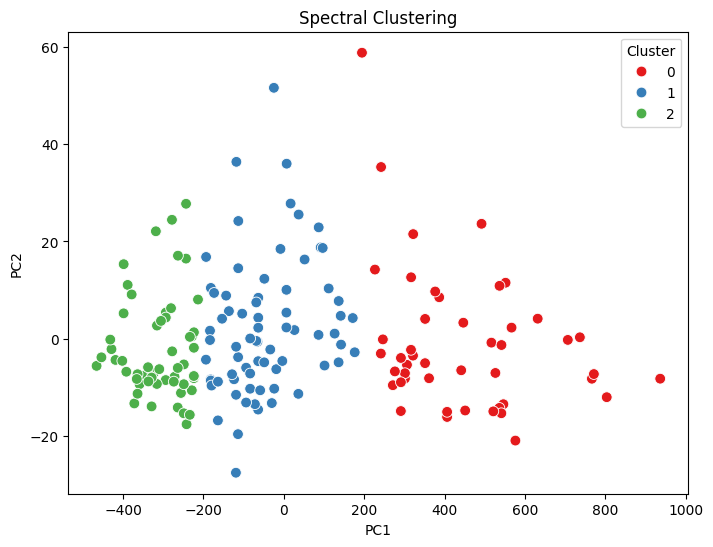

Silhouette Score: 0.558
Davies-Bouldin Score: 0.525
Calinski-Harabasz Score: 515.956


In [ ]:
# Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=10, assign_labels='kmeans', random_state=42)
spectral_clusters = spectral.fit_predict(train_data_sin_procesar)

# Graficar la solución
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=spectral_clusters, palette="Set1", s=60)
plt.title("Spectral Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

## Cálculo de Métricas de Evaluación de Clustering

# Silhouette Score
silhouette_avg = silhouette_score(train_data_sin_procesar, spectral_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(train_data_sin_procesar, spectral_clusters)
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(train_data_sin_procesar, spectral_clusters)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.3f}")

##**14. Conclusión final:**

En esta fase final del análisis de clustering, el modelo K-Means con 2 clústeres se posicionó inicialmente como la mejor opción para segmentar los datos sin preprocesar. Basándonos en las métricas internas de evaluación, esta configuración mostró un rendimiento superior con un Silhouette Score de 0.656, un Davies-Bouldin Score de 0.484 y un Calinski-Harabasz Score de 488.062. Estas métricas indicaban una clara cohesión interna y una adecuada separación entre los clústeres, superando en rendimiento a otras configuraciones y algoritmos probados.

Sin embargo, a pesar de las métricas iniciales, el método del codo sugería un número óptimo de clústeres cercano a 3 o 4. Más importante aún, dado que las muestras de vino provienen de uvas cultivadas en la misma región de Italia, pero derivadas de tres cultivares diferentes, finalmente se optó por seleccionar el modelo **K-Means con 3 clústeres**. Esta decisión se tomó priorizando la realidad del dominio y la utilidad práctica del modelo, a pesar de que sus métricas internas fueran ligeramente inferiores.

Las métricas para el modelo K-Means con 3 clústeres fueron las siguientes: **Silhouette Score de 0.573, Davies-Bouldin Score de 0.531 y Calinski-Harabasz Score de 542.653**. Aunque estos valores son menores que los obtenidos con 2 clústeres, son aceptables y la elección se justifica por:

- **Coherencia con la Realidad del Negocio**: Si existen tres orígenes conocidos, el modelo debe ser capaz de identificar y agrupar los vinos en esos tres segmentos reales, lo cual un modelo de dos clústeres no podría lograr satisfactoriamente.
- **Facilidad de Interpretación y Aplicabilidad**: Un modelo que clasifica los vinos en tres grupos, correspondientes directamente a los tres cultivares, ofrece una interpretación clara y directa. Esto permite que los resultados sean comprensibles y aplicables por expertos enólogos o personal relacionado con la producción y distribución del vino, facilitando la toma de decisiones.

##**15. Caracterización de clusters:**

Se va a intentar caracterizar los clusters con el fin de darles una etiqueta.

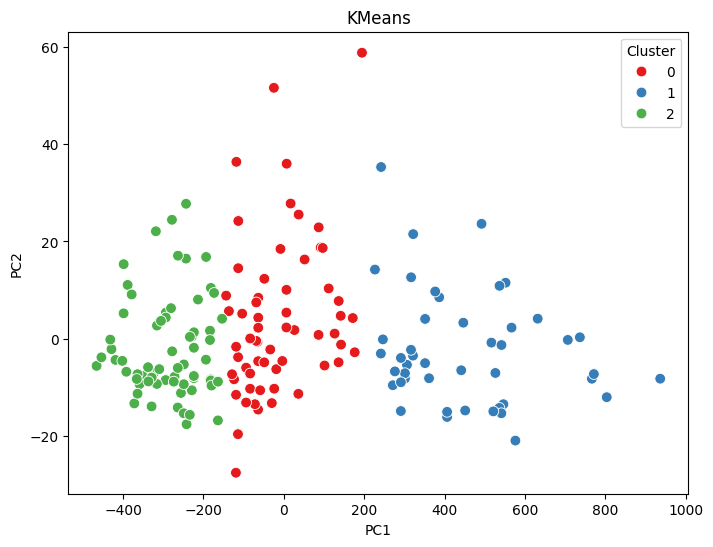

Silhouette Score: 0.573
Davies-Bouldin Score: 0.531
Calinski-Harabasz Score: 542.650


In [ ]:
# K-means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(train_data_sin_procesar)

# Realizar PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(train_data_sin_procesar)

# Graficar la solución
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_clusters, palette="Set1", s=60)
plt.title("KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

## Cálculo de Métricas de Evaluación de Clustering

# Silhouette Score
silhouette_avg = silhouette_score(train_data_sin_procesar, kmeans_clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(train_data_sin_procesar, kmeans_clusters)
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.3f}")

# Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(train_data_sin_procesar, kmeans_clusters)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.3f}")

In [ ]:
# Añado una columna (Cluster) al conjunto de datos
train_data_sin_procesar['Cluster'] = kmeans_clusters

# Calculo la media de cada característica por clúster
resumen_clusters = train_data_sin_procesar.groupby('Cluster').mean()

resumen_clusters

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Cluster,,,,,,,,,,,,,
0,12.918000,2.489000,2.400667,19.950000,103.516667,2.110833,1.578000,0.389667,1.513333,5.677000,0.884600,2.349833,728.533333
1,13.797111,1.844000,2.419778,16.860000,105.488889,2.864667,3.017111,0.284889,1.914667,5.712889,1.080444,3.118222,1195.711111
2,12.518824,2.513676,2.293971,20.841176,92.558824,2.070147,1.754853,0.391912,1.457941,4.078235,0.938529,2.476176,457.470588


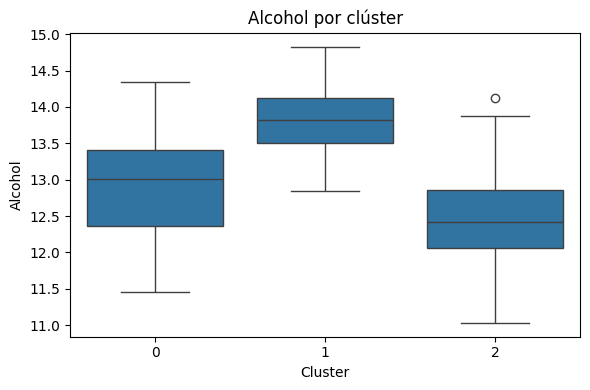

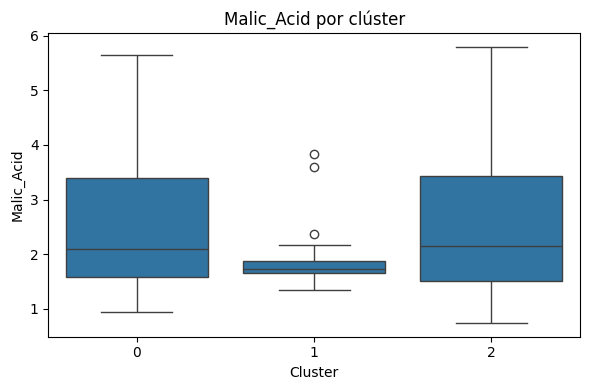

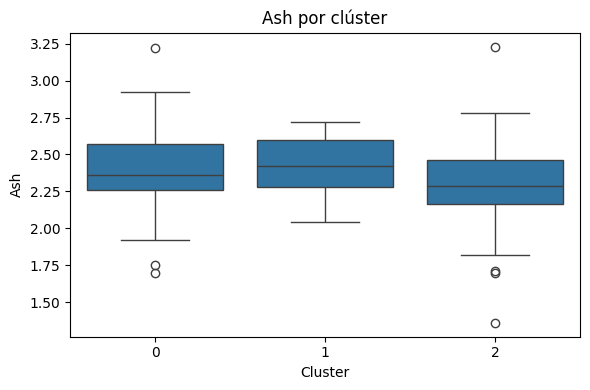

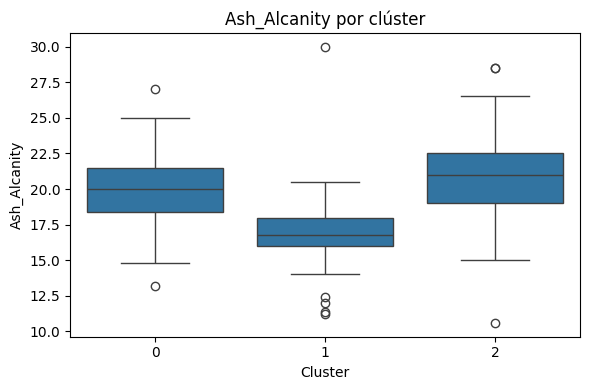

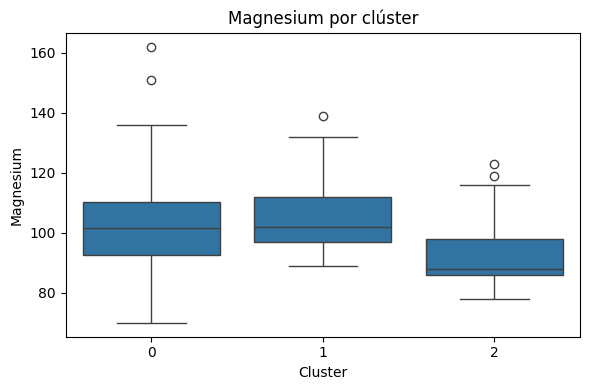

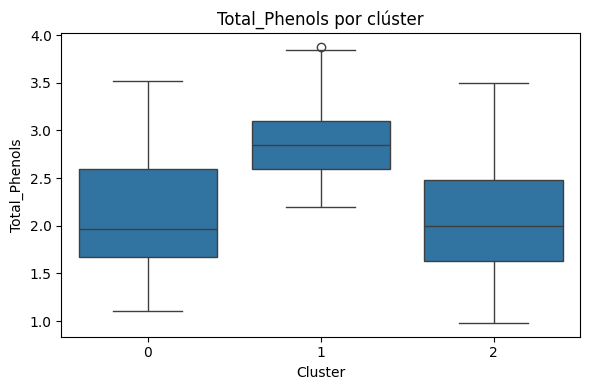

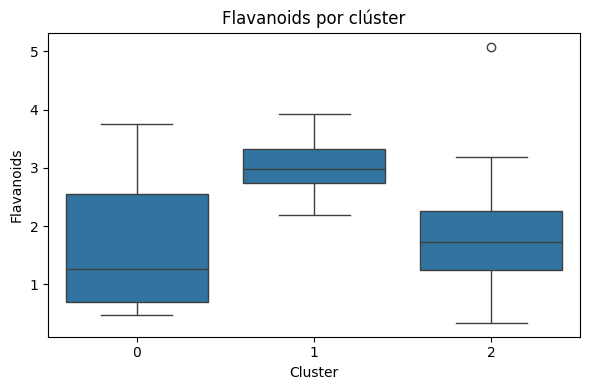

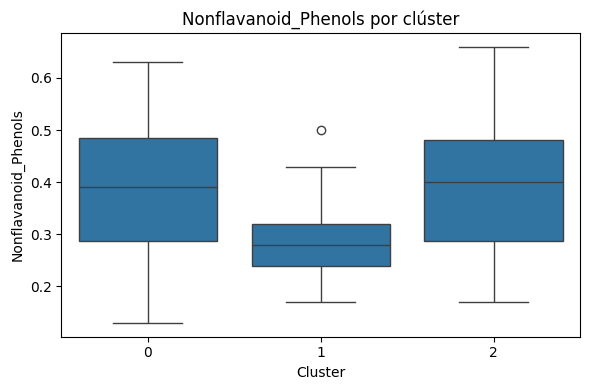

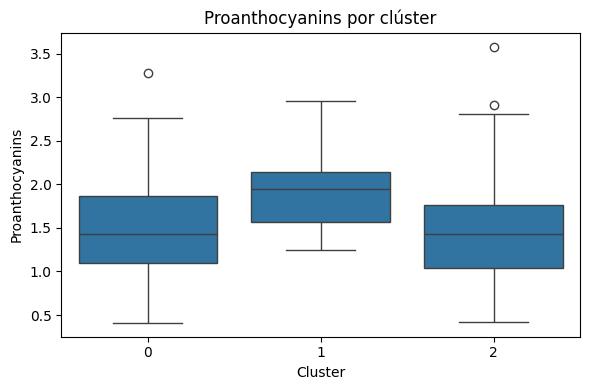

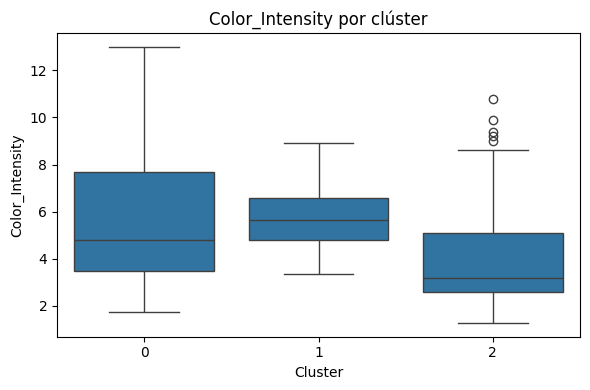

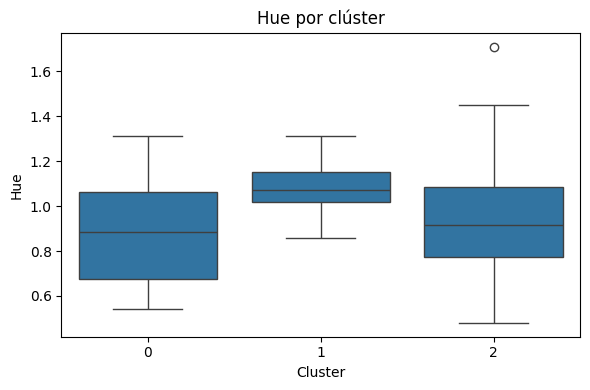

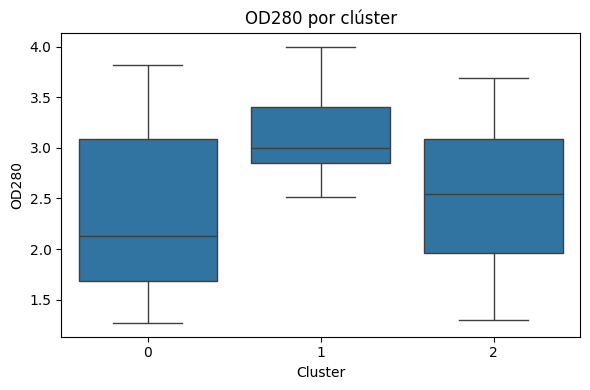

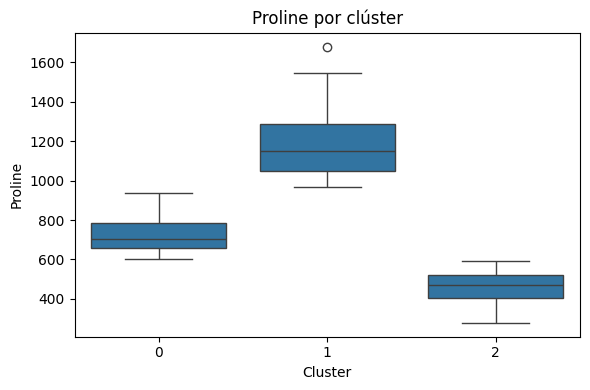

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in train_data_sin_procesar.columns[:-1]:  # Excluye la columna 'Cluster'
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Cluster', y=col, data=train_data_sin_procesar)
    plt.title(f'{col} por clúster')
    plt.tight_layout()
    plt.show()

In [ ]:
# Modifico el nombre e los clusters en el conjunto de datos
resumen_clusters = resumen_clusters.reset_index()

resumen_clusters['Cluster'] = resumen_clusters['Cluster'].replace({0: 'Vinos rosados ligeros', 1: 'Vinos tintos Premium', 2:'Vinos Blancos Ácidos'})
resumen_clusters

,Cluster,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,Vinos rosados ligeros,12.918000,2.489000,2.400667,19.950000,103.516667,2.110833,1.578000,0.389667,1.513333,5.677000,0.884600,2.349833,728.533333
1,Vinos tintos Premium,13.797111,1.844000,2.419778,16.860000,105.488889,2.864667,3.017111,0.284889,1.914667,5.712889,1.080444,3.118222,1195.711111
2,Vinos Blancos Ácidos,12.518824,2.513676,2.293971,20.841176,92.558824,2.070147,1.754853,0.391912,1.457941,4.078235,0.938529,2.476176,457.470588


##**16. Análisis de Clusters de Vinos:**

Tras realizar un análisis cluster basado en variables químicas y organolépticas, se han obtenido tres grupos principales con las siguientes características:

- **Clúster 0: Vinos Rosados Ligeros**: Vinos con baja intensidad de color, bajos fenoles y flavonoides, pero con una acidez suavizada por la alcalinidad. Esto encaja con rosados ligeros o incluso algunos blancos muy pálidos.

- **Clúster 1: Vinos Tintos Premium**: Vinos con perfil más robusto, ricos en fenoles, flavonoides y con buen potencial de envejecimiento. El alcohol es promedio, pero la concentración de compuestos de calidad es muy alta.

-**Clúster 2: Vinos Blancos Ácidos**: La combinación de alta acidez málica, alto alcohol y la intensidad de color más baja de los tres clústeres sugiere fuertemente un vino blanco con una acidez marcada, o quizás un rosado muy pálido y ácido.

##**17. Guardar el modelo:**

In [ ]:
import pickle

# Guardar el modelo entrenado en un archivo
with open('modelo_kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# Cargar el modelo
with open('modelo_kmeans.pkl', 'rb') as f:
    kmeans = pickle.load(f)